In [1]:
import pandas as pd
ds = pd.read_csv('diabetes.csv')

In [2]:
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x_data = ds.iloc[:,:-1]
y_data = ds.iloc[:,-1]

In [4]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y_data.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

scaler_StandardScaler = StandardScaler()
X_scaled_StandardScaler = scaler_StandardScaler.fit_transform(x_data)



In [7]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=1) 

In [8]:
x_train_selected_StandardScaler = scaler_StandardScaler.fit_transform(x_train)
x_test_selected_StandardScaler = scaler_StandardScaler.transform(x_test)

In [9]:
from sklearn.naive_bayes import GaussianNB

GaussianNB_classifier = GaussianNB()

GaussianNB_classifier.fit(x_train_selected_StandardScaler, y_train)

GaussianNB()

In [10]:
y_pred_StandardScaler = GaussianNB_classifier.predict(x_test_selected_StandardScaler)

In [11]:
from sklearn.metrics import accuracy_score

accuracy_StandardScaler = accuracy_score(y_test, y_pred_StandardScaler) * 100

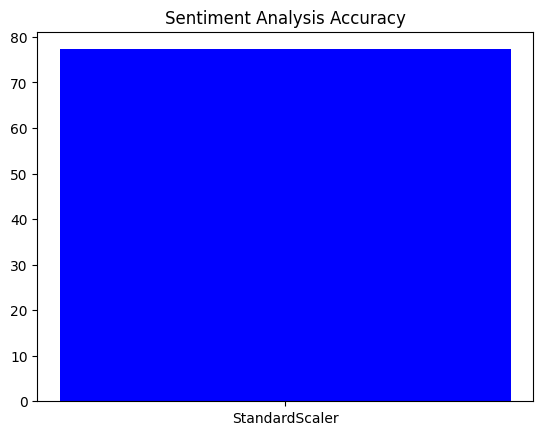

accuracy StandardScaler:77.27272727272727 %


In [12]:
import matplotlib.pyplot as plt

plt.bar(['StandardScaler'], [accuracy_StandardScaler], color=['blue'])
plt.title('Sentiment Analysis Accuracy')
plt.show()

print(f'accuracy StandardScaler:{accuracy_StandardScaler} %')

In [13]:
from sklearn.svm import SVC

svm_classifier = SVC()

svm_classifier.fit(x_train_selected_StandardScaler, y_train)

SVC()

In [14]:
y_pred_StandardScaler_s = svm_classifier.predict(x_test_selected_StandardScaler)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_StandardScaler = accuracy_score(y_test, y_pred_StandardScaler_s) * 100

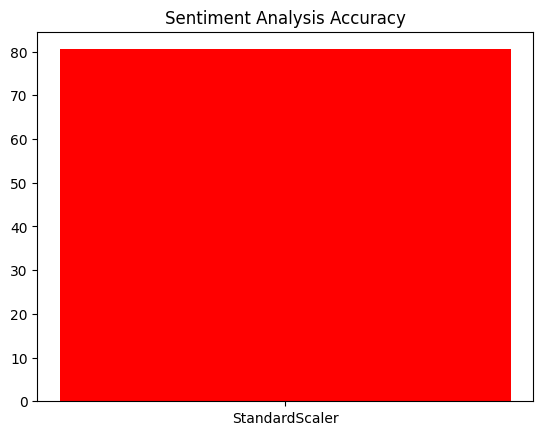

accuracy StandardScaler:80.51948051948052 %


In [16]:
import matplotlib.pyplot as plt

plt.bar(['StandardScaler'], [accuracy_StandardScaler], color=['red'])
plt.title('Sentiment Analysis Accuracy')
plt.show()

print(f'accuracy StandardScaler:{accuracy_StandardScaler} %')

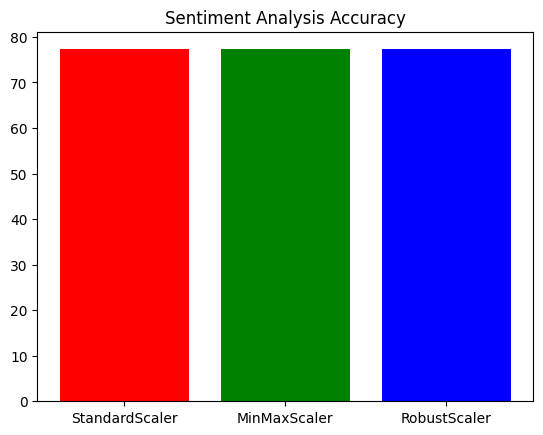

Naive Bayes accuracies: [77.27272727272727, 77.27272727272727, 77.27272727272727]


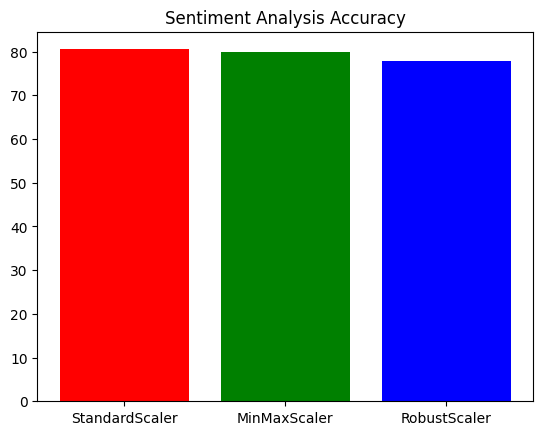

SVM accuracies: [80.51948051948052, 79.87012987012987, 77.92207792207793]


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def load_data(file_path):
    ds = pd.read_csv(file_path)
    x_data = ds.iloc[:,:-1]
    y_data = ds.iloc[:,-1]
    return x_data, y_data

def scale_data(x_data, scaler):
    return scaler.fit_transform(x_data)

def train_and_predict(classifier, x_train, y_train, x_test):
    classifier.fit(x_train, y_train)
    return classifier.predict(x_test)

def calculate_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred) * 100

def plot_accuracy(accuracies):
    labels = ['StandardScaler', 'MinMaxScaler', 'RobustScaler']
    colors = ['red', 'green', 'blue']
    plt.bar(labels, accuracies, color=colors)
    plt.title('Sentiment Analysis Accuracy')
    plt.show()

def main():
    file_path = 'diabetes.csv'
    x_data, y_data = load_data(file_path)

    scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
    accuracies_nb = []
    accuracies_svm = []

    for scaler in scalers:
        x_scaled = scale_data(x_data, scaler)
        x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.2, random_state=1)

        # Naive Bayes
        nb_classifier = GaussianNB()
        y_pred_nb = train_and_predict(nb_classifier, x_train, y_train, x_test)
        accuracy_nb = calculate_accuracy(y_test, y_pred_nb)
        accuracies_nb.append(accuracy_nb)

        # SVM
        svm_classifier = SVC(kernel='rbf')
        y_pred_svm = train_and_predict(svm_classifier, x_train, y_train, x_test)
        accuracy_svm = calculate_accuracy(y_test, y_pred_svm)
        accuracies_svm.append(accuracy_svm)

    # Plotting accuracies for Naive Bayes
    plot_accuracy(accuracies_nb)
    print(f'Naive Bayes accuracies: {accuracies_nb}')

    # Plotting accuracies for SVM
    plot_accuracy(accuracies_svm)
    print(f'SVM accuracies: {accuracies_svm}')

if __name__ == "__main__":
    main()
